<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/04_DataScience_And_Visualization/blob/main/01_DataScienceIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Science

In this course, we will understand more about Data Science. To that end, we will perform an exploratory data analysis over a dataset of movie ratings. Thus, we will:

*  Understand data types;
*  Learn more about data visualization;
*  Use a summary metric;
*  Use different Python packages to get to our result.

In this project, we will use data from different sources. All of our data we be related to movie ratings. Let's import our data:


In [2]:
import pandas as pd

In [3]:
movie_lens = pd.read_csv('ratings.csv')
movie_lens

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Our first dataset is from Movie Lens, and it stores different ratings performed by different users, each for a given user and movie. Let's check the size of our dataset:

In [4]:
movie_lens.shape

(100836, 4)

We have 100,836 entries and 4 columns. Here, we are worried about the ratings for each movie. In this dataset, these ratings may be:

In [5]:
list_unique = movie_lens.rating.unique( )
list_unique.sort( )
list_unique

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Thus, our ratings go from 0.5 to 5.0! Let's count how many times each rating was performed:

In [6]:
movie_lens.rating.value_counts( )

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

So, the most frequent rating is 4.0, followed by 3.0 and 5.0. The less frequent rating is 0.5. We can visualize this using a countplot:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


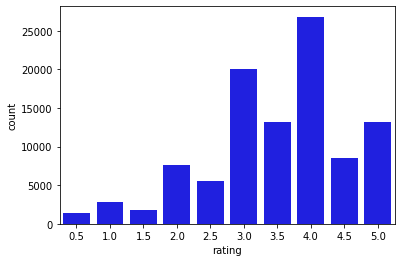

In [7]:
import seaborn as sns

sns.countplot(movie_lens.rating, color = 'blue')

Nice! Here, it becomes easier to understand the behavior of our data!

Let's see some descriptive statistics:

In [8]:
movie_lens.rating.describe( )

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

So, our mean rating is 3.5016, and our median is 3.50 (very close to the mean). Here, we also have informations about our quartiles, which we can visualize using a boxplot: 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


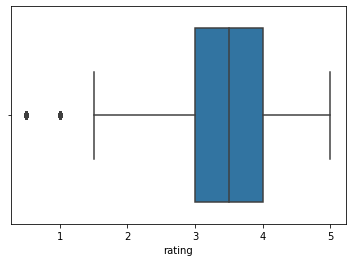

In [9]:
sns.boxplot(movie_lens.rating)

# Exploratory Data Analysis

To better understand our dataset, we can perform an Exploratory Data Analysis (EDA). First, let's import a dataset containing the movie names and their respective Ids:

In [10]:
movies = pd.read_csv('movies.csv')
movies.head( )

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


So, let's see the ratings for Toy Story, which has movieId = 1. Thus, let's go to our previous dataset and get the ratings for Toy Story: 

In [11]:
movie_lens.query('movieId == 1').rating

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: rating, Length: 215, dtype: float64

Nice! Let's take a look of some descriptive statistics for Toy Story:

In [12]:
movie_lens.query('movieId == 1').rating.describe( )

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

Great! 

We can also get these descriptive statistics for all movies using the groupby method. Thus, we can first groupby movieId:

In [13]:
movie_lens_grouped = movie_lens.groupby('movieId')

Now, let's get the mean rating for each movie:

In [14]:
movie_lens_grouped.mean( ).rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

Nice! We now have the average rating for each movie. Let's see how the average rating is distributed:

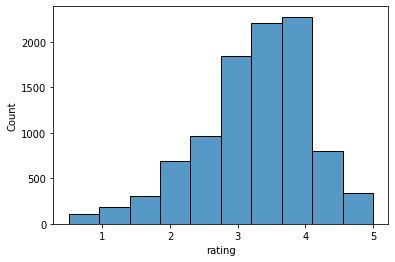

In [15]:
sns.histplot(movie_lens_grouped.mean( ).rating, bins = 10)

We can also get a sense of how data is distributed using a boxplot:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


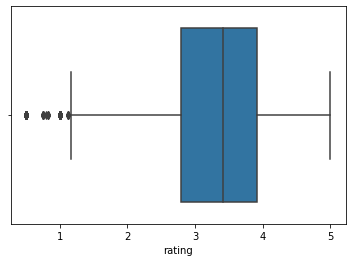

In [16]:
sns.boxplot(movie_lens_grouped.mean( ).rating)

# Data types

Now, let's use another dataset with movie ratings, this time from The Movie DataBase (TMDB):

In [17]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [18]:
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Our dataset now has much more features, such as the movie budget, genres, homepage, ratings, number of votes, popularity, original language, and others.

Let's see the datatype of these features:

In [19]:
tmdb.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Note that the features found here can be of different typing: some are integers (such as voute_count and id), others are floating point numbers (such as runtime and vote_average), and most of them are objects (or text). 

Let's analyze some specific features:

In [20]:
tmdb.original_language.unique( )

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Note that the original_language has different possibilities, and it basically states the language spoken in the movie. Note that there is no way to sort this feature from a best (or highest) value from the worst (or lowest). This feature is **categorical**, and it simply serves as a way to categorize entries. Since it only gives each feature a name, it is a **nominal** feature. **Categorical** features can also be **ordinal**, if they are able to be sorted. For instance, the level of income of a family (A, B, C, D, or E) is a ordinal categorical variable, as it can be ordered. 

**Quantitative** features, on the other hand, store a numerical variable. These can be **integers** (such as the vote count, which can't store decimal values) or **floating point numbers** (such as the average movie rating, which stores decimals).

# Data visualization

Now, let's continue to perform our data visualization. First, let's get the frequency of a categorical feature. We already know that we can count the values of a categorical variable using value_counts( ):

In [28]:
count_lang = tmdb.original_language.value_counts( ).to_frame( ).reset_index( )
count_lang.columns = ['language', 'total']
count_lang.head( )

,language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Now, to plot this result, we need to use a categorical plot. 

https://seaborn.pydata.org/tutorial/categorical.html

Here, we will use a very simple graph: a barplot.

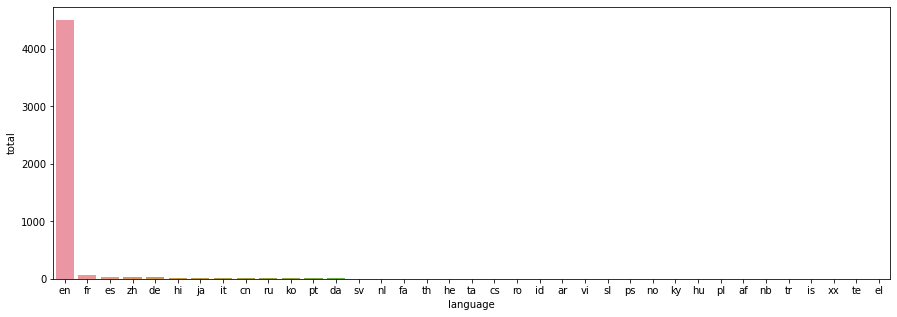

In [30]:
ax = sns.barplot(x = 'language', y = 'total', data = count_lang)
ax.figure.set_size_inches(15, 5)

Nice! Using our barplot we can easily see that the vast majority of our movies have language = es (english).

Another option is to use a catplot to count the number of entries of a given category. Documentation for the catplot can be found in:

https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

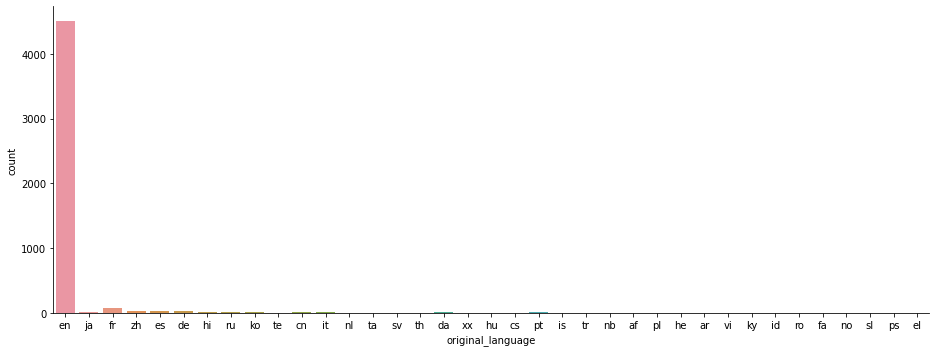

In [34]:
ax = sns.catplot(x = 'original_language', data = tmdb, kind = 'count')
ax.figure.set_size_inches(15, 5)

To better visualize the differences between different languages, we can use a pie plot:

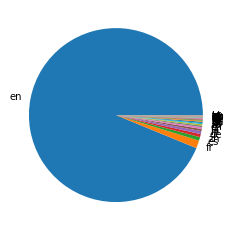

In [37]:
import matplotlib.pyplot as plt

plt.pie(count_lang.total, labels = count_lang.language);

Note that it is very hard to visualize the pie plot because we have a very low frequency of most languages. To make it easier for us to understand this aspect, we can actually try to compare the english language with all other languages. First, let's organize our data. Let's create a column that says 1 if the language is english, or 0 otherwise:

In [42]:
tmdb['is_eng'] = tmdb.original_language.apply(lambda x : 1 if x == 'en' else 0)

Now, let's make the count plot once again:

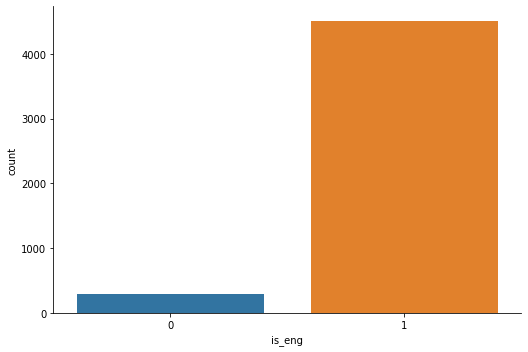

In [44]:
ax = sns.catplot(x = 'is_eng', data = tmdb, kind = 'count')
ax.figure.set_size_inches(8, 5)

Nice! Now we were able to get a much better sense of how much more movies use the english language.

Now, let's try to visualize how the other languages are distributed:

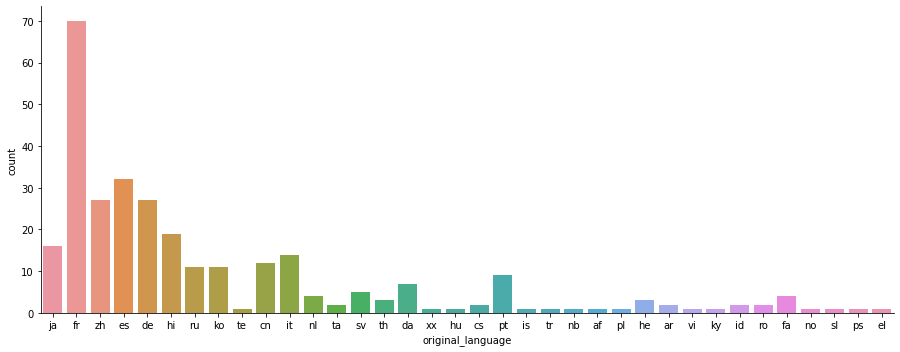

In [46]:
other_languages = tmdb.query("original_language != 'en'")
ax = sns.catplot(x = 'original_language', data = other_languages, kind = 'count')
ax.figure.set_size_inches(14, 5)

Great! Now, we can more easily visualize that french is the second most used language (after english), followed by spanish. Let's refine our graph:

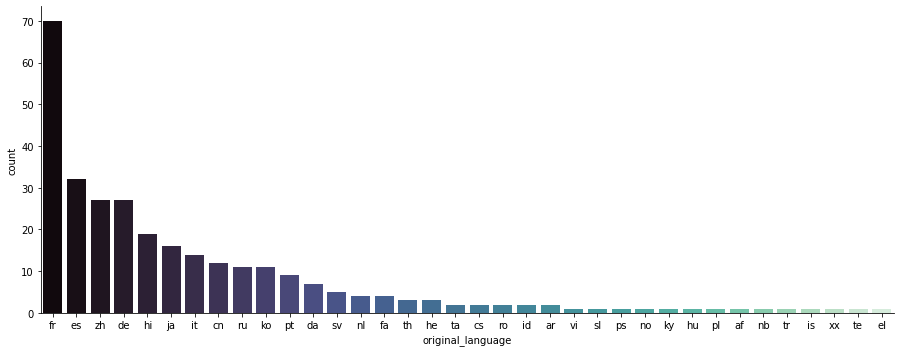

In [54]:
sorted_lang = count_lang.language.drop(0)

ax = sns.catplot(x = 'original_language', data = other_languages, kind = 'count', order = sorted_lang, palette = "mako")
ax.figure.set_size_inches(14, 5)

Now, let's try to make another graph. But first, let's make a query to separate data from two movies:

In [57]:
toy_story_ratings = movie_lens.query("movieId == 1").rating
jumanji_ratings   = movie_lens.query("movieId == 2").rating

Now, let's see the descriptive statistics for each of these movies. For Toy Story:

In [58]:
toy_story_ratings.describe( )

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [59]:
jumanji_ratings.describe( )

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

So, we have 215 ratings for Toy Story, showing an average of 3.92. For Jumanji, however, we have 110 ratings, showing an average of 3.43. To better compare these two movies, we can use a boxplot:

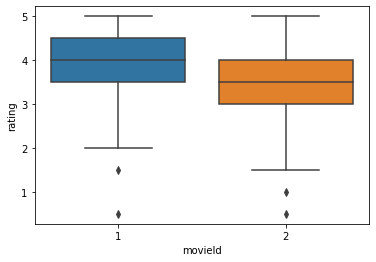

In [60]:
sns.boxplot(x = 'movieId', y = 'rating', data = movie_lens.query("movieId in [1, 2]"))

We note that, by the distribution of ratings, ratings for Toy Story are usually than ratings for Jumanji. 